<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%203%20Deep%20RL%202/CartPoleDQN_Sln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q Network (DQN) for CartPole Using Boltzmann Q Policy
This exercise implements a DQN for CartPole using a Boltzmann Q policy for selecting the actions

In [ ]:
# install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
!pip install keras-rl2

In [ ]:
!pip install gym

In [ ]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

In [ ]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import BoltzmannQPolicy  # import the policy
from rl.agents.dqn import DQNAgent      # import the DQN agent

Implementation of DQN for CartPole, applying policy BoltzmannQPolicy

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None
Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   22/10000: episode: 1, duration: 1.851s, episode steps:  22, steps per second:  12, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 0.508501, mae: 0.646089, mean_q: -0.064522
   37/10000: episode: 2, duration: 0.113s, episode steps:  15, steps per second: 132, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.733 [0.000, 1.000],  loss: 0.498503, mae: 0.660585, mean_q: -0.007458


/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   58/10000: episode: 3, duration: 0.161s, episode steps:  21, steps per second: 131, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.714 [0.000, 1.000],  loss: 0.410333, mae: 0.579068, mean_q: 0.100719
   75/10000: episode: 4, duration: 0.126s, episode steps:  17, steps per second: 135, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.647 [0.000, 1.000],  loss: 0.370710, mae: 0.547997, mean_q: 0.205263
   89/10000: episode: 5, duration: 0.109s, episode steps:  14, steps per second: 129, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.357 [0.000, 1.000],  loss: 0.368100, mae: 0.531072, mean_q: 0.280399
  104/10000: episode: 6, duration: 0.112s, episode steps:  15, steps per second: 134, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.333233, mae: 0.513013, mean_q: 0.351245
  123/10000: episode: 7, duration: 0.147s, episode steps:  19, steps per

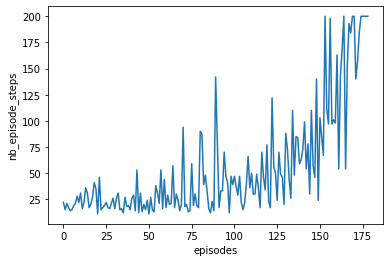

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 195.000, steps: 195
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 171.000, steps: 171
Episode 14: reward: 199.000, steps: 199
Episode 15: reward: 198.000, steps: 198
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import BoltzmannQPolicy  # import the policy
from rl.agents.dqn import DQNAgent      # import the DQN agent

# setup experience replay buffer
# here the sequential memory limit is set up the same as the nb_steps (number of steps)
# parameter in the fit method.  This means that all the action-states will fit into the
# memory buffer
# keep window_length as 1. It's used in other RL methods, but keep it to 1 in DQNs
memory = SequentialMemory(limit=10000, window_length=1)

# define the policy (how we select the actions)
policy = BoltzmannQPolicy()

# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

# define the agent
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=10,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy)                   # the action selection policy

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

##Implement DQN with BoltzmannGumbelQPolicy instead of BoltzmannQPolicy

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None
Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   16/10000: episode: 1, duration: 1.120s, episode steps:  16, steps per second:  14, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 0.560935, mae: 0.626279, mean_q: 0.238333
   31/10000: episode: 2, duration: 0.101s, episode steps:  15, steps per second: 148, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.133 [0.000, 1.000],  loss: 0.478536, mae: 0.612231, mean_q: 0.223342


/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   46/10000: episode: 3, duration: 0.108s, episode steps:  15, steps per second: 139, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.200 [0.000, 1.000],  loss: 0.414500, mae: 0.673849, mean_q: 0.187327
   55/10000: episode: 4, duration: 0.063s, episode steps:   9, steps per second: 143, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.342510, mae: 0.659907, mean_q: 0.260872
   65/10000: episode: 5, duration: 0.068s, episode steps:  10, steps per second: 147, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.301094, mae: 0.629075, mean_q: 0.369332
   77/10000: episode: 6, duration: 0.089s, episode steps:  12, steps per second: 134, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.083 [0.000, 1.000],  loss: 0.277227, mae: 0.628563, mean_q: 0.518231
   88/10000: episode: 7, duration: 0.077s, episode steps:  11, steps per

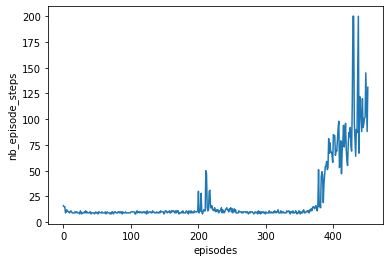

Testing for 20 episodes ...
Episode 1: reward: 100.000, steps: 100
Episode 2: reward: 108.000, steps: 108
Episode 3: reward: 100.000, steps: 100
Episode 4: reward: 122.000, steps: 122
Episode 5: reward: 146.000, steps: 146
Episode 6: reward: 102.000, steps: 102
Episode 7: reward: 110.000, steps: 110
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 105.000, steps: 105
Episode 10: reward: 116.000, steps: 116
Episode 11: reward: 106.000, steps: 106
Episode 12: reward: 106.000, steps: 106
Episode 13: reward: 126.000, steps: 126
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 132.000, steps: 132
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 114.000, steps: 114
Episode 18: reward: 104.000, steps: 104
Episode 19: reward: 100.000, steps: 100
Episode 20: reward: 136.000, steps: 136


In [ ]:
from rl.policy import BoltzmannGumbelQPolicy

# setup experience replay buffer
memory = SequentialMemory(limit=10000, window_length=1)

# Implements Boltzmann-Gumbel exploration (BGE) adapted for Q learning
# based on the paper (https://arxiv.org/pdf/1705.10257.pdf).
policy = BoltzmannGumbelQPolicy()

# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

# define the agent
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=10,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy)                   # the action selection policy

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

## Implement DQN with BoltzmannQPolicy and LinearAnnaeledPolicy, changing the tau parameter

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None
Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


   10/10000: episode: 1, duration: 0.234s, episode steps:  10, steps per second:  43, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.100 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_tau: --


/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


   32/10000: episode: 2, duration: 1.130s, episode steps:  22, steps per second:  19, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.682 [0.000, 1.000],  loss: 0.614277, mae: 0.757352, mean_q: 0.001071, mean_tau: 0.998110
   42/10000: episode: 3, duration: 0.074s, episode steps:  10, steps per second: 136, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.200 [0.000, 1.000],  loss: 0.507593, mae: 0.622799, mean_q: 0.083170, mean_tau: 0.996715
   91/10000: episode: 4, duration: 0.322s, episode steps:  49, steps per second: 152, episode reward: 49.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.388 [0.000, 1.000],  loss: 0.395888, mae: 0.565525, mean_q: 0.291105, mean_tau: 0.994060
  101/10000: episode: 5, duration: 0.070s, episode steps:  10, steps per second: 144, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.100 [0.000, 1.000],  loss: 0.321278, mae: 0.530837, mean_q: 0.482307, mean_tau: 0

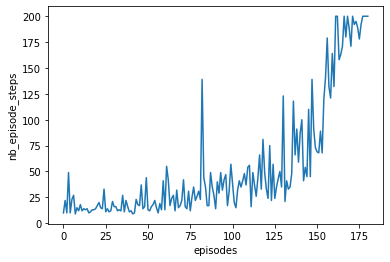

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
from rl.policy import BoltzmannQPolicy

# setup experience replay buffer
memory = SequentialMemory(limit=10000, window_length=1)

# setup the Linear annealed policy with the BoltzmannQPolicy as the inner policy
policy =  LinearAnnealedPolicy(inner_policy=BoltzmannQPolicy(),   # policy used to select actions
                               attr='tau',                        # attribute in the inner policy to vary             
                               value_max=1,                       # maximum value of attribute that is varying
                               value_min=.1,                      # minimum value of attribute that is varying
                               value_test=.05,                    # test if the value selected is < 0.05
                               nb_steps=10000)                    # the number of steps between value_max and value_min

# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# add extra layers here
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

# define the agent
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=10,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy)                   # the action selection policy

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

## Double DQN Network

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None
Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   11/10000: episode: 1, duration: 1.291s, episode steps:  11, steps per second:   9, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.091 [0.000, 1.000],  loss: --, mae: --, mean_q: --
   33/10000: episode: 2, duration: 0.176s, episode steps:  22, steps per second: 125, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 0.573160, mae: 0.575699, mean_q: -0.010063


/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   58/10000: episode: 3, duration: 0.201s, episode steps:  25, steps per second: 124, episode reward: 25.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.560 [0.000, 1.000],  loss: 0.443116, mae: 0.525977, mean_q: 0.156823
   92/10000: episode: 4, duration: 0.258s, episode steps:  34, steps per second: 132, episode reward: 34.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.471 [0.000, 1.000],  loss: 0.389077, mae: 0.534718, mean_q: 0.322848
  121/10000: episode: 5, duration: 0.221s, episode steps:  29, steps per second: 131, episode reward: 29.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.483 [0.000, 1.000],  loss: 0.342883, mae: 0.561623, mean_q: 0.445189
  180/10000: episode: 6, duration: 0.447s, episode steps:  59, steps per second: 132, episode reward: 59.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.424 [0.000, 1.000],  loss: 0.299238, mae: 0.628068, mean_q: 0.654785
  193/10000: episode: 7, duration: 0.102s, episode steps:  13, steps per

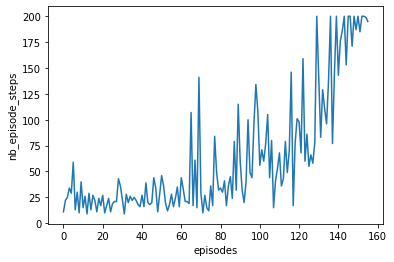

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 196.000, steps: 196
Episode 5: reward: 194.000, steps: 194
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 187.000, steps: 187
Episode 9: reward: 198.000, steps: 198
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 190.000, steps: 190
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 194.000, steps: 194
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 197.000, steps: 197
Episode 20: reward: 200.000, steps: 200


In [ ]:
from rl.policy import BoltzmannQPolicy  # import the policy

# setup experience replay buffer
memory = SequentialMemory(limit=10000, window_length=1)

# define the policy (how we select the actions)
policy = BoltzmannQPolicy()

# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

# define the agent
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=10,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               enable_double_dqn=True,          # a boolean which enables a target network as a second network proposed by van Hasselt et al. to decrease overfitting
               policy=policy)                   # the action selection policy

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

## Dueling DQN Network

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None
Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   11/10000: episode: 1, duration: 1.536s, episode steps:  11, steps per second:   7, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.636 [0.000, 1.000],  loss: --, mae: --, mean_q: --
   27/10000: episode: 2, duration: 0.119s, episode steps:  16, steps per second: 134, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.562 [0.000, 1.000],  loss: 0.796586, mae: 0.750080, mean_q: -0.043674


/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   45/10000: episode: 3, duration: 0.141s, episode steps:  18, steps per second: 128, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.389 [0.000, 1.000],  loss: 0.557516, mae: 0.623282, mean_q: 0.040503
   63/10000: episode: 4, duration: 0.136s, episode steps:  18, steps per second: 133, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.611 [0.000, 1.000],  loss: 0.420971, mae: 0.573569, mean_q: 0.199130
  117/10000: episode: 5, duration: 0.398s, episode steps:  54, steps per second: 136, episode reward: 54.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.519 [0.000, 1.000],  loss: 0.319741, mae: 0.548318, mean_q: 0.367938
  144/10000: episode: 6, duration: 0.194s, episode steps:  27, steps per second: 139, episode reward: 27.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.481 [0.000, 1.000],  loss: 0.268376, mae: 0.597034, mean_q: 0.586644
  169/10000: episode: 7, duration: 0.182s, episode steps:  25, steps per

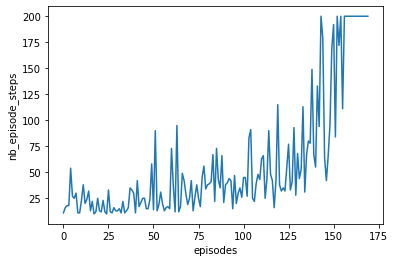

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
from rl.policy import BoltzmannQPolicy  # import the policy

# setup experience replay buffer
memory = SequentialMemory(limit=10000, window_length=1)

# define the policy (how we select the actions)
policy = BoltzmannQPolicy()

# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

# define the agent
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=10,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               enable_dueling_network=True,     # a boolean which enables duelling architecture proposed by Mnih et al.
               dueling_type='avg',              # if enable_duelling_dqn is set to true, a type of duellin garchitecture must be chosen. 'avg' is recommended
               policy=policy)                   # the action selection policy

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

## Double Dueling DQN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None
Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   13/10000: episode: 1, duration: 0.708s, episode steps:  13, steps per second:  18, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.615 [0.000, 1.000],  loss: 0.917992, mae: 0.814913, mean_q: 0.041791


/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   42/10000: episode: 2, duration: 0.234s, episode steps:  29, steps per second: 124, episode reward: 29.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.517 [0.000, 1.000],  loss: 0.626052, mae: 0.634501, mean_q: 0.082130
   56/10000: episode: 3, duration: 0.105s, episode steps:  14, steps per second: 133, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.643 [0.000, 1.000],  loss: 0.480196, mae: 0.546651, mean_q: 0.152525
   74/10000: episode: 4, duration: 0.152s, episode steps:  18, steps per second: 118, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 0.413478, mae: 0.521755, mean_q: 0.212122
   84/10000: episode: 5, duration: 0.085s, episode steps:  10, steps per second: 117, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.368436, mae: 0.528378, mean_q: 0.276493
   99/10000: episode: 6, duration: 0.121s, episode steps:  15, steps per

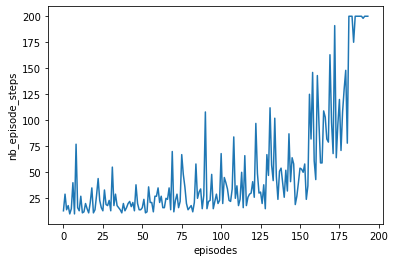

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
from rl.policy import BoltzmannQPolicy  # import the policy

# setup experience replay buffer
memory = SequentialMemory(limit=10000, window_length=1)

# define the policy (how we select the actions)
policy = BoltzmannQPolicy()

# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

# define the agent
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=10,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               enable_double_dqn=True,          # a boolean which enables a target network as a second network proposed by van Hasselt et al. to decrease overfitting
               enable_dueling_network=True,     # a boolean which enables duelling architecture proposed by Mnih et al.
               dueling_type='avg',              # if enable_duelling_dqn is set to true, a type of duellin garchitecture must be chosen. 'avg' is recommended
               policy=policy)                   # the action selection policy

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)